<a href="https://colab.research.google.com/github/jkbanjarey/Face-Mask-Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Modules

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset  is extracted')

The dataset  is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2858.jpg', 'with_mask_3631.jpg', 'with_mask_635.jpg', 'with_mask_3085.jpg', 'with_mask_1950.jpg']
['with_mask_2717.jpg', 'with_mask_3652.jpg', 'with_mask_2478.jpg', 'with_mask_1930.jpg', 'with_mask_2006.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1746.jpg', 'without_mask_16.jpg', 'without_mask_3102.jpg', 'without_mask_132.jpg', 'without_mask_3761.jpg']
['without_mask_2811.jpg', 'without_mask_1400.jpg', 'without_mask_2544.jpg', 'without_mask_320.jpg', 'without_mask_1126.jpg']


In [9]:
print('number of mask images:', len(with_mask_files))
print('number of without mask images:', len(without_mask_files))

number of mask images: 3725
number of without mask images: 3828


In [10]:
# create the labels

with_mask_label = [1]*3725
without_mask_label = [0]*3828

print(with_mask_label[0:5])

print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


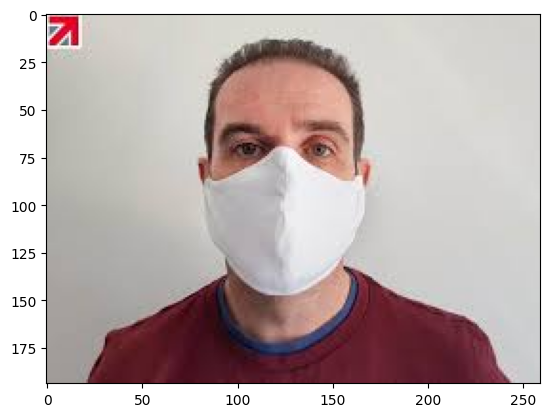

In [12]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2858.jpg')
imgplot = plt.imshow(img)
plt.show()

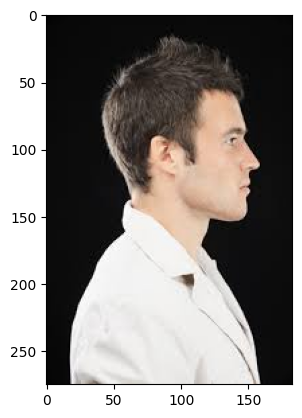

In [13]:
# displaying image without mask
img = mpimg.imread('/content/data/without_mask/without_mask_2858.jpg')
imgplot = plt.imshow(img)
plt.show()

In [14]:
#Image Processing

with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
len(data)

7553

In [16]:
type(data)

list

array([[[251, 245, 248],
        [251, 217, 223],
        [252, 216, 213],
        ...,
        [211, 210, 206],
        [211, 210, 206],
        [211, 210, 206]],

       [[237, 197, 199],
        [197,  64,  86],
        [218,  49,  75],
        ...,
        [211, 210, 206],
        [211, 210, 206],
        [211, 210, 206]],

       [[224, 190, 178],
        [176,  15,  40],
        [219,   0,  37],
        ...,
        [211, 210, 206],
        [211, 210, 206],
        [211, 210, 206]],

       ...,

       [[161, 156, 153],
        [161, 156, 153],
        [161, 156, 153],
        ...,
        [199, 205, 205],
        [200, 204, 205],
        [202, 203, 205]],

       [[161, 156, 153],
        [161, 156, 153],
        [161, 156, 153],
        ...,
        [200, 204, 205],
        [200, 204, 205],
        [202, 203, 205]],

       [[160, 155, 152],
        [160, 155, 152],
        [160, 155, 152],
        ...,
        [202, 203, 203],
        [200, 204, 203],
        [202, 203, 205]]], dtype=uint8)
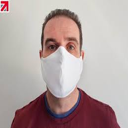

In [17]:
data[0]

In [18]:
X = np.array(data)
Y = np.array(labels)

type(X)

numpy.ndarray

In [19]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [21]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[69, 65, 66],
        [69, 65, 66],
        [67, 63, 64],
        ...,
        [62, 56, 57],
        [63, 57, 56],
        [59, 54, 51]],

       [[68, 63, 65],
        [68, 64, 65],
        [67, 63, 64],
        ...,
        [56, 51, 51],
        [60, 54, 51],
        [59, 53, 50]],

       [[65, 59, 61],
        [62, 56, 58],
        [61, 55, 57],
        ...,
        [54, 48, 46],
        [60, 53, 50],
        [63, 54, 52]],

       ...,

       [[44, 41, 50],
        [44, 41, 50],
        [41, 38, 49],
        ...,
        [22, 22, 35],
        [20, 22, 34],
        [19, 21, 33]],

       [[46, 43, 52],
        [45, 43, 51],
        [42, 38, 48],
        ...,
        [21, 21, 34],
        [20, 20, 32],
        [19, 21, 33]],

       [[48, 45, 54],
        [46, 43, 52],
        [42, 38, 48],
        ...,
        [20, 20, 33],
        [20, 20, 32],
        [19, 21, 33]]], dtype=uint8)
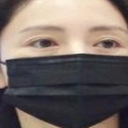

In [22]:
X_train[0]

In [23]:
X_train_scaled[0]

array([[[0.27058824, 0.25490196, 0.25882353],
        [0.27058824, 0.25490196, 0.25882353],
        [0.2627451 , 0.24705882, 0.25098039],
        ...,
        [0.24313725, 0.21960784, 0.22352941],
        [0.24705882, 0.22352941, 0.21960784],
        [0.23137255, 0.21176471, 0.2       ]],

       [[0.26666667, 0.24705882, 0.25490196],
        [0.26666667, 0.25098039, 0.25490196],
        [0.2627451 , 0.24705882, 0.25098039],
        ...,
        [0.21960784, 0.2       , 0.2       ],
        [0.23529412, 0.21176471, 0.2       ],
        [0.23137255, 0.20784314, 0.19607843]],

       [[0.25490196, 0.23137255, 0.23921569],
        [0.24313725, 0.21960784, 0.22745098],
        [0.23921569, 0.21568627, 0.22352941],
        ...,
        [0.21176471, 0.18823529, 0.18039216],
        [0.23529412, 0.20784314, 0.19607843],
        [0.24705882, 0.21176471, 0.20392157]],

       ...,

       [[0.17254902, 0.16078431, 0.19607843],
        [0.17254902, 0.16078431, 0.19607843],
        [0.16078431, 0

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
#model

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# compile the Neural Network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 135s 777ms/step - acc: 0.7034 - loss: 0.6998 - val_acc: 0.8413 - val_loss: 0.3227
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 130s 764ms/step - acc: 0.8767 - loss: 0.3038 - val_acc: 0.8975 - val_loss: 0.2436
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 132s 774ms/step - acc: 0.9096 - loss: 0.2305 - val_acc: 0.9289 - val_loss: 0.2226
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 128s 752ms/step - acc: 0.9258 - loss: 0.1979 - val_acc: 0.9306 - val_loss: 0.1919
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 129s 759ms/step - acc: 0.9387 - loss: 0.1583 - val_acc: 0.9322 - val_loss: 0.2152
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 130s 761ms/step - acc: 0.9520 - loss: 0.1248 - val_acc: 0.9455 - val_loss: 0.1709
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 129s 757ms/step - acc: 0.9591 - loss: 0.1255 - val_acc: 0.9306 - val_loss: 0.1923
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 127s 748ms/step - acc: 0.9605 - loss: 0.1018 - val_acc: 0.9372 - val_loss: 0.1974
Epoch 9/10
170/170 ━━━━━

In [30]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - acc: 0.9194 - loss: 0.2700
Test accuracy = 0.9272005558013916


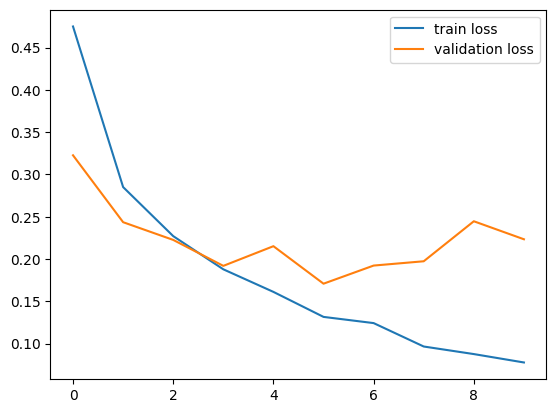

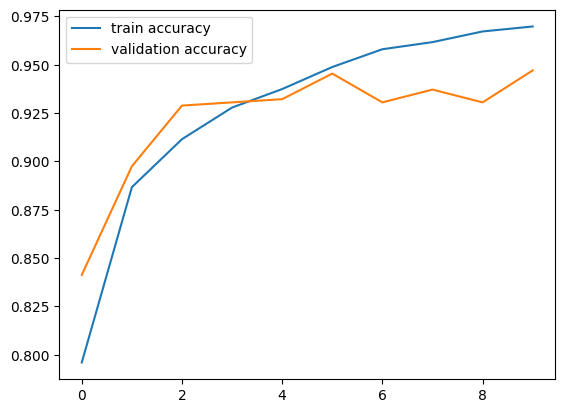

In [31]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()